In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

#load data
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

#read and store data
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

#merge data
combined_data = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [16]:
#group by Drug Regimen
regimen_group = combined_data.groupby(["Drug Regimen"])

#stats
#mean and format by two decimal point
mean = regimen_group["Tumor Volume (mm3)"].mean().map('{:,.2f}'.format)
#median
median = regimen_group["Tumor Volume (mm3)"].median().map('{:,.2f}'.format)
#variance
variance = regimen_group["Tumor Volume (mm3)"].var().map('{:,.2f}'.format)
#std
std = regimen_group["Tumor Volume (mm3)"].std().map('{:,.2f}'.format)
#SEM
sem = regimen_group["Tumor Volume (mm3)"].sem().map('{:,.2f}'.format)

#table
stats_summary = pd.DataFrame({"Mean":mean, "Median":median, "Variance":variance, "Standard Deviation":std, "SEM":sem})
stats_summary


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


Text(0, 0.5, 'Data Points')

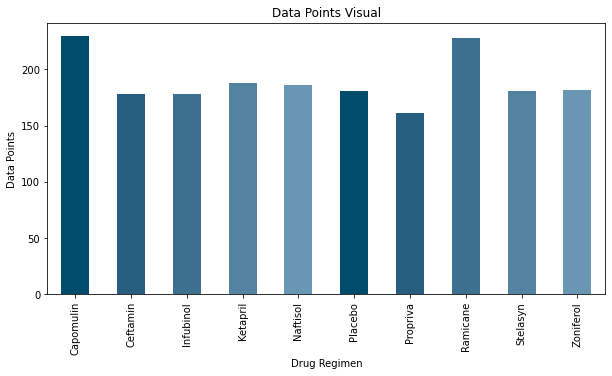

In [17]:
#bar plot for each regimen using pandas
#color list
my_colors = ['#004c6d', '#255e7e', '#3d708f', '#5383a1', '#6996b3']

#data points by regimen
regimen_points = combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"]

#Creating Chart
regimen_points.plot(kind="bar", figsize=(10,5), color=my_colors)

#set chart title
plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

In [19]:
#bar plot using pyplot
#publish drug list
drug_list = stats_summary.index.tolist()
drug_list

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [20]:
#calculate age months for each regimen in a list
drug_count = (combined_data.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
drug_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

Text(0, 0.5, 'Data Points')

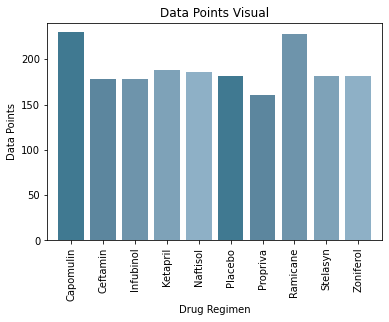

In [44]:
#assign x axis
x_axis = np.arange(len(drug_count))
x_axis = drug_list

#creating bar chart
plt.bar(x_axis, drug_count, color=my_colors, alpha=0.75, align='center')

#setting ticks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_list, rotation='vertical')

#setting X and Y limits
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(drug_count)+10)

#Titles and Labels
plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

Text(0.5, 1.0, 'Distribution of Female vs Male')

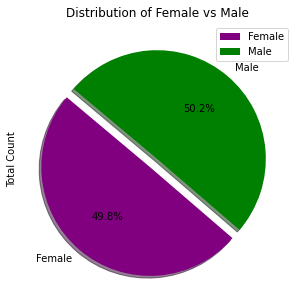

In [51]:
#pie plots using pandas
gender_groups = combined_data.groupby(["Mouse ID", "Sex"])

mouse_gender_table = pd.DataFrame(gender_groups.size())

#create table with total count
mouse_gender = pd.DataFrame(mouse_gender_table.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

#format percentage
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

#creating pie chart
colors = ['purple', 'green']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count', figsize=(5,5), colors = colors, startangle = 140, explode = explode, shadow = True, autopct="%1.1f%%")
plt.title("Distribution of Female vs Male")

Text(0.5, 1.0, 'Distribution of Female vs Male')

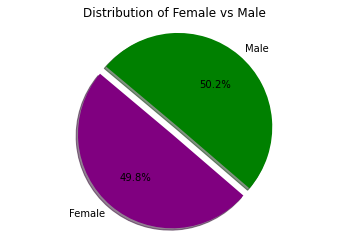

In [50]:
#pie plots using pyplot
labels = ["Female", "Male"]

#values of pie chart
sizes = [49.8, 50.2]

#colors of pie
colors = ['purple', 'green']

#which section to detach
explode = (0.1, 0)

#Create pie chart based upon the values 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

#Set equal axis
plt.axis("equal")
plt.title("Distribution of Female vs Male")

In [56]:
#calculate best regimes
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
top_regimes = combined_data[combined_data["Drug Regimen"].isin(top_4)]
top_regimes = top_regimes.sort_values(["Timepoint"], ascending=True)
top_regimes

top_regimes_data = top_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
top_regimes_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


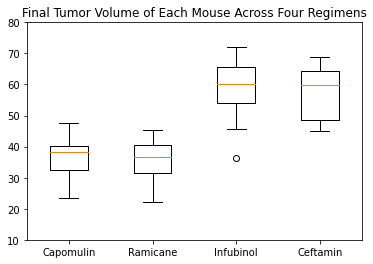

In [61]:
sort_top_regimes = top_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']

sort_top_regimes_table = sort_top_regimes.to_frame()

final_data = sort_top_regimes_table.reset_index()
tumor_list = final_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_table = pd.DataFrame(tumor_list)
tumor_list_table = tumor_list_table.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_table['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.title("Final Tumor Volume of Each Mouse Across Four Regimens")
plt.show()

In [74]:
#line plot with Capomulin
# Create a new DataFrame that looks into Capomulin
capomulin = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]
capomulin = capomulin_df.reset_index()
capomulin.head()

,level_0,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [75]:
# Select data of a single mouse
cap_single = capomulin.loc[capomulin_df["Mouse ID"] == "s185"]
cap_single

,level_0,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,9,19,s185,Capomulin,Female,3,17,45,23.343598,1


<AxesSubplot:title={'center':'Timepoint vs Tumor Volume'}, xlabel='Timepoint'>

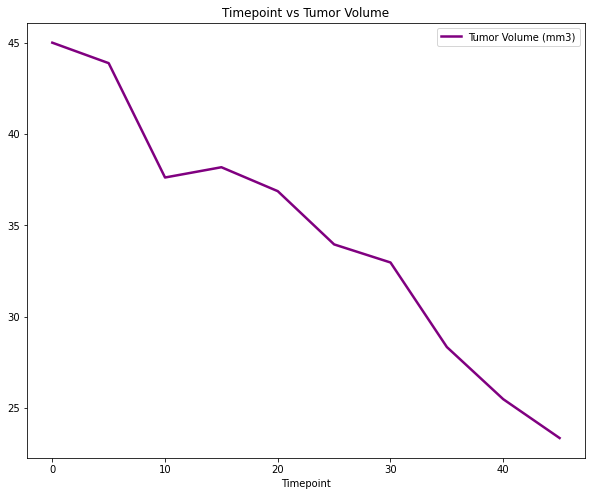

In [78]:
# Selecting only 2 columns
cap_single = cap_single.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]

#Reset the index
cap_single = cap_single.reset_index(drop=True)
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_single.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='purple', title ="Timepoint vs Tumor Volume")

In [77]:
#scatter plot of weight versus tumor volume for Capomulin
#weight
weight = capomulin.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
#avg tumor volume
avg_tumor = pd.DataFrame(weight.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
#rename column from Tumor Volume (mm3) to Average Volume
avg_vol = avg_tumor.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
avg_vol.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


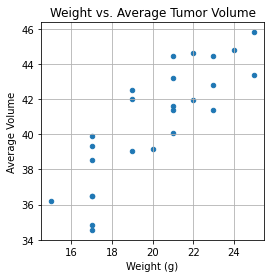

In [79]:
#create scatter plot
avg_vol.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4), title="Weight vs. Average Tumor Volume")
plt.show()

In [80]:
plt.clf()
plt.cla()
plt.close()

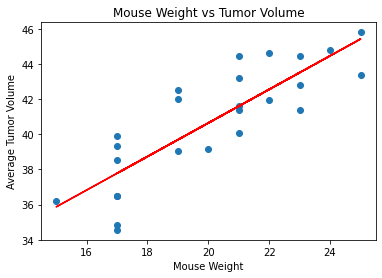

In [83]:
from scipy.stats import linregress

# Add the lineear regression equation and line to the scatter plot
x_values = avg_vol["Weight (g)"]
y_values = avg_vol["Average Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.title("Mouse Weight vs Tumor Volume")
plt.show()